In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import gridspec
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np
import xarray as xr
import cmocean.cm as cmo

In [2]:
base_path = Path("/work/n01/n01/fwg/irminger-proj/")

In [3]:
ds = xr.open_zarr(base_path / "data/interim/standard.zarr")
ds

<xarray.Dataset>
Dimensions:   (YC: 250, XC: 750, Z: 500, Zp1: 501, time: 672, XG: 750, YG: 250,
               Zl: 500, Zu: 500)
Coordinates: (12/34)
    Depth     (YC, XC) float32 dask.array<chunksize=(125, 375), meta=np.ndarray>
    PHrefC    (Z) float32 dask.array<chunksize=(500,), meta=np.ndarray>
    PHrefF    (Zp1) float32 dask.array<chunksize=(501,), meta=np.ndarray>
  * XC        (XC) float32 100.0 300.0 500.0 ... 1.495e+05 1.497e+05 1.499e+05
  * XG        (XG) float32 0.0 200.0 400.0 ... 1.494e+05 1.496e+05 1.498e+05
  * YC        (YC) float32 100.0 300.0 500.0 ... 4.95e+04 4.97e+04 4.99e+04
    ...        ...
    rA        (YC, XC) float32 dask.array<chunksize=(125, 375), meta=np.ndarray>
    rAs       (YG, XC) float32 dask.array<chunksize=(125, 375), meta=np.ndarray>
    rAw       (YC, XG) float32 dask.array<chunksize=(125, 375), meta=np.ndarray>
    rAz       (YG, XG) float32 dask.array<chunksize=(125, 375), meta=np.ndarray>
    rhoRef    (Z) float32 dask.array<chunksize=(500,), meta=np.ndarray>
  * time      (time) timedelta64[ns] 0 days 00:00:00 ... 83 days 21:00:00
Data variables:
    RHOAnoma  (time, Z, YC, XC) float32 dask.array<chunksize=(1, 500, 250, 750), meta=np.ndarray>
    UVEL      (time, Z, YC, XG) float32 dask.array<chunksize=(1, 500, 250, 750), meta=np.ndarray>
    VVEL      (time, Z, YG, XC) float32 dask.array<chunksize=(1, 500, 250, 750), meta=np.ndarray>
    WVEL      (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 500, 250, 750), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      Created by calling `open_mdsdataset(grid_dir=None, iters=No...
    source:       MITgcm
    title:        netCDF wrapper of MITgcm MDS binary data

In [21]:
fpath = Path("/home/n01/n01/fwg/.local/share/fonts/Arial.ttf")
font_prop = fm.FontProperties(fname=fpath)
plt.rcParams['font.family'] = font_prop.get_family()
plt.rcParams['font.sans-serif'] = [font_prop.get_name()]

plt.rc('xtick', labelsize='18')
plt.rc('ytick', labelsize='18')
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['figure.titlesize'] = 20
plt.rcParams["axes.labelsize"] = 18
plt.rcParams["figure.labelsize"] = 18
#plt.rcParams['xtick.major.pad'] = 8
#plt.rcParams['ytick.major.pad'] = 8


#plt.rcParams["text.latex.preamble"] = "\\usepackage{euler} \\usepackage{paratype}  \\usepackage{mathfont} \\mathfont[digits]{PT Sans}"
#plt.rcParams["pgf.preamble"] = plt.rcParams["text.latex.preamble"]
plt.rc('text', usetex=False)
# output
dpi = 600

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

/mnt/lustre/a2fs-work1/work/n01/n01/fwg/irminger-proj/irminger-proj/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


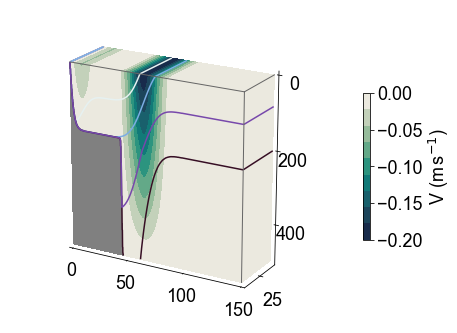

In [41]:
# Define dimensions
X, Y, Z = ds["XC"].values * 1e-3, ds["YG"].values * 1e-3, -ds["Z"].values

# Create fake data
it = 0
data = ds["VVEL"].isel(time=it)
cmo.tempo_r.set_bad("gray")


# Create a figure with 3D ax
cm = 0.394
fig = plt.figure(figsize=(16.5 * cm, 12 * cm))
ax = fig.add_subplot(111, projection='3d')

# Plot contour surfaces

vmin = -.2
vmax = 0
kw = {
    'vmin': vmin, #data.min().values,
    'vmax': vmax, #data.max().values,
    'levels': np.linspace(vmin, vmax, 10),
    'cmap': cmo.tempo_r,
}

# xy-plane
_ = ax.contourf(
    X, Y, data.isel(Z=0).values,
    zdir='z', offset=0, **kw
)


Xm, Zm = np.meshgrid(X, Z)
# xz-plane
_ = ax.contourf(
    Xm, data.isel(YG=0).values, Zm,
    zdir='y', offset=0, **kw
)

# yz-plane
C = ax.contourf(
    data.isel(XC=-2).values, Y, Z,
    zdir='x', offset=X.max(), **kw
)
# --


X, Y, Z = ds["XC"].values * 1e-3, ds["YC"].values * 1e-3, -ds["Z"].values
data = ds["RHOAnoma"].isel(time=it) + ds["rhoRef"] - 1000

vmin = 26.92
vmax = 27.1211
kw = {
    'vmin': vmin, #data.min().values,
    'vmax': vmax, #data.max().values,
    'levels': [26.92, 26.98, 27.05, 27.1211],
    'cmap': cmo.dense,
}

_ = ax.contour(
    X, Y, data.isel(Z=0).values,
    zdir='z', offset=0, **kw
)


Xm, Zm = np.meshgrid(X, Z)
# xz-plane
_ = ax.contour(
    Xm, data.isel(YC=0).values, Zm,
    zdir='y', offset=0, **kw
)

Ym, Zm = np.meshgrid(Y, Z)
# yz-plane
C2 = ax.contour(
    data.isel(XC=-1).values, Ym, Zm,
    zdir='x', offset=X.max(), **kw,
)


Xm, Zm = np.meshgrid(X, Z)
# xz-plane
_ = ax.contourf(
    Xm, ds["maskC"].isel(YC=0).values, Zm,
    zdir='y', offset=0, levels=[0, 0.5], zorder=1e3, colors=["grey", "grey"]
)

# Set limits of the plot from coord limits
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
zmin, zmax = Z.min(), Z.max()
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

# Plot edges
edges_kw = dict(color='0.4', linewidth=1, zorder=1e3)
ax.plot([xmax, xmax], [ymin, ymax], 0, **edges_kw)
ax.plot([xmin, xmax], [ymin, ymin], 0, **edges_kw)
ax.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)

# Set labels and zticks
ax.set(
    zticks=[0, 200, 400],
    yticks=[25],
    xticks=[0, 50, 100, 150],
    xlim=(0, 150),
    ylim=(0, 50),
    zlim=(0, 500),
)

#ax.set_xlabel('Longitude (km)', labelpad=18)
#ax.set_ylabel('', labelpad=13)
#ax.set_zlabel('Depth (m)',labelpad=15)

ax.invert_zaxis()

# Set zoom and angle view
ax.view_init(20, -60, 0)
ax.set_box_aspect((125, 40, 125), zoom=0.9)

# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

# Colorbar
fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label='V (m$\,$s$^{-1}$)', ticks=[0, -0.05, -0.1, -0.15, -0.2])

ax.patch.set_alpha(0)
ax.grid("off")

fig.savefig("modelsetup.pdf", dpi=dpi)

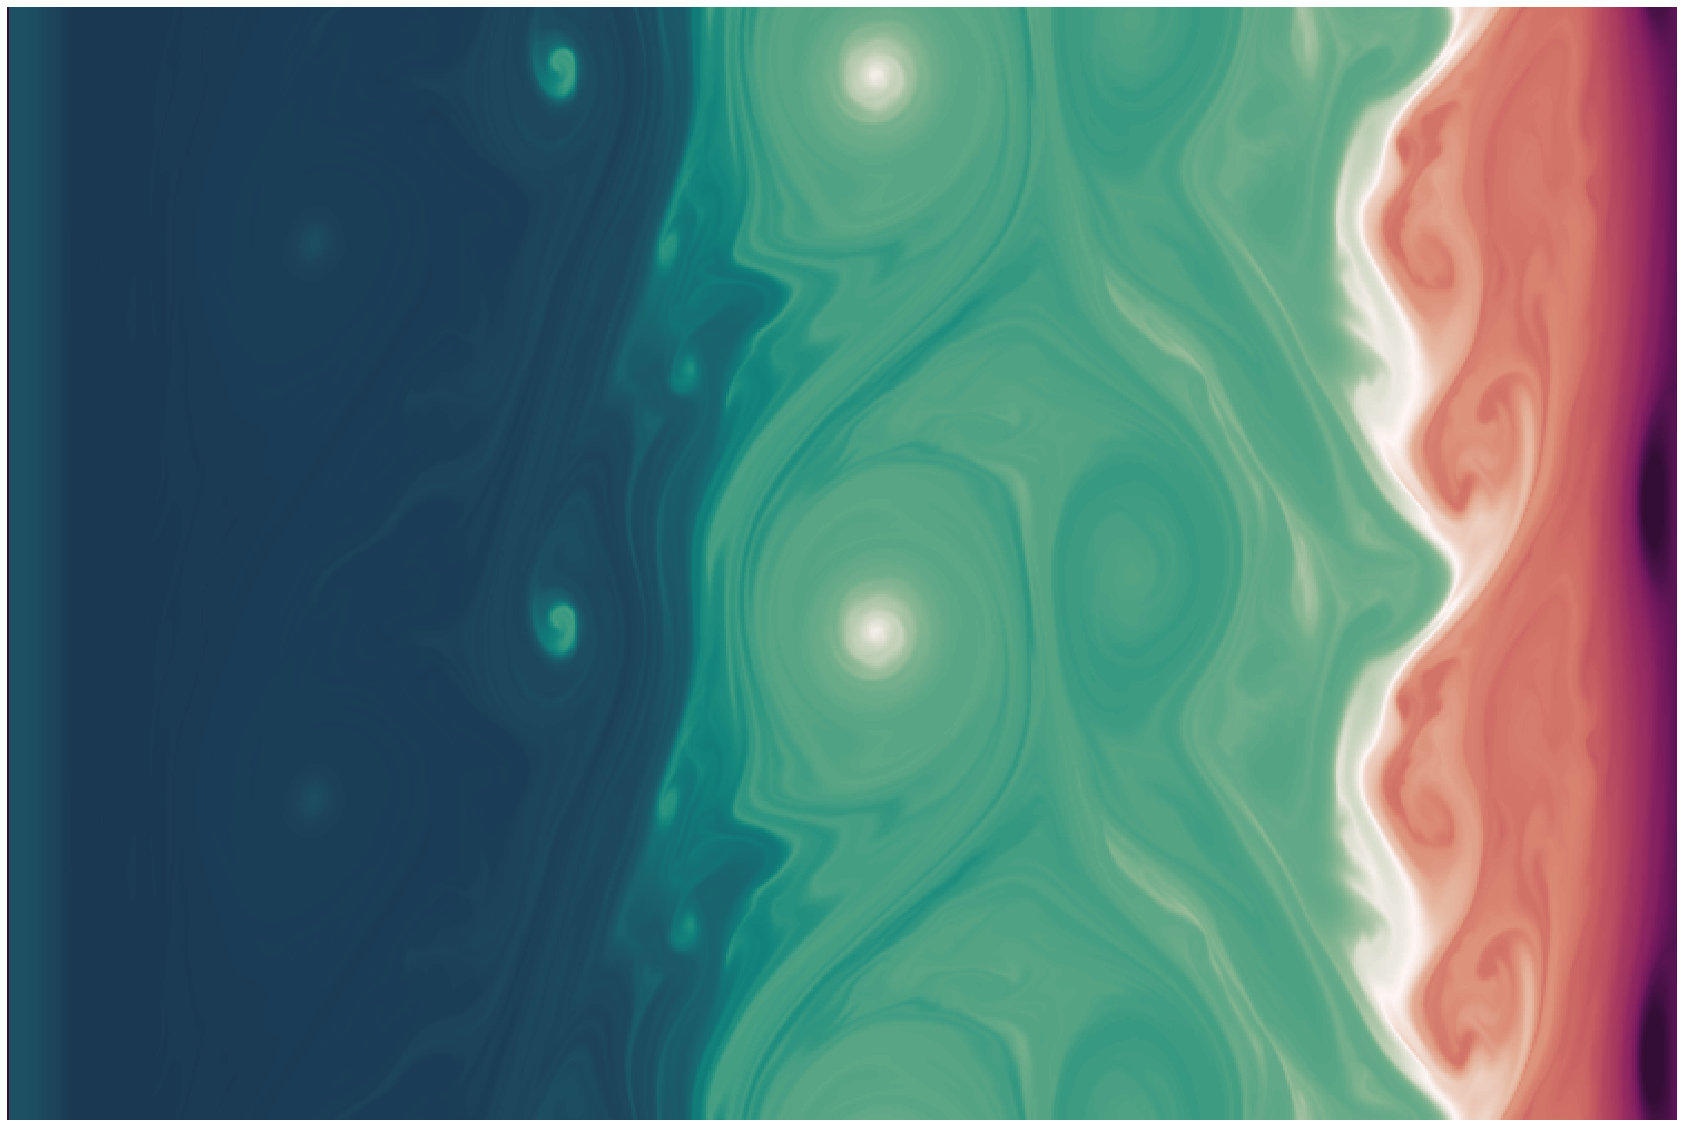

In [116]:
fig, ax = plt.subplots(figsize=(70*cm, 40*cm))

rho_img = ds["RHOAnoma"].isel(time=-1, Z=0).values
rho_img = np.tile(rho_img.transpose(), 2).transpose()
cax = ax.pcolormesh(rho_img, cmap=cmo.curl, vmin=-0.13, vmax=0.12)
#fig.colorbar(cax)
ax.axis("off")
ax.set_aspect("equal")
fig.tight_layout()
fig.show()
fig.savefig("background.png", dpi=dpi)